#Business Understanding:
Google Store was introduced on March 11, 2015, and has replaced Google Play&#39;s Devices
section as the hardware retailer for Google. Ana Corrales, who is also the COO of the Google
Computer Hardware division, manages it. Google has also been experimenting with the physical
locations. In November 2016, Google opened &quot;Google store&quot;, a shop-inside-a-store where
Google shows its hardware products.

#Data understanding
Google Merchandize Store has collaborated with Kaggle to predict the revenue per customer and
released its data in its website to the public for better prediction decisions and improved
perspectives. The dataset contains around 900000 observations. From which the model has
predicted the total revenue spent by each customer from various visits to the store website.
The data taken for the project is the customer visits and the revenue made by them by purchasing
the products in the Gstore website every time they visit the website.

#Data Preparation:
Usually the data won’t be that much accurate other than quantitative information. Most
commonplace mistakes within the information are lacking values and statistics inconsistencies.
Consequently, as part of data cleaning technique the above referred to issues have been
addressed. The data types have been converted into required formats. Similarly, statistics
integration became completed to construct a very last statistics set suitable for model building.


In [1]:
#Libraries
import pandas as pd
import numpy as np

# plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# remove warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
train = pd.read_csv('E:\\RAGUL Christ\\Capstone\\Dataset\\train.csv')
test = pd.read_csv('E:\\RAGUL Christ\\Capstone\\Dataset\\test.csv')
train.shape, test.shape

((903653, 12), (804684, 12))

In [3]:
train.head()
test.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6167871330617112363,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",6167871330617112363_1508151024,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508151024,2,1508151024
1,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0643697640977915618,"{""continent"": ""Europe"", ""subContinent"": ""South...",0643697640977915618_1508175522,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508175522,1,1508175522
2,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6059383810968229466,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",6059383810968229466_1508143220,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""7"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508143220,1,1508143220
3,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2376720078563423631,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2376720078563423631_1508193530,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""8"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508193530,1,1508193530
4,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2314544520795440038,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2314544520795440038_1508217442,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""9"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508217442,1,1508217442


In [4]:
train.tail()
test.tail()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
804679,Social,20180421,"{""browser"": ""Edge"", ""browserVersion"": ""not ava...",9084225574121020383,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",9084225574121020383_1524358436,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""33"", ""pageviews"": ""26""}","{""referralPath"": ""/intl/en/yt/about/"", ""campai...",1524358436,2,1524358436
804680,Social,20180421,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6146210385566305056,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",6146210385566305056_1524317728,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""36"", ""pageviews"": ""34...","{""referralPath"": ""/yt/lineups/es/index.html"", ...",1524317728,1,1524317728
804681,Social,20180421,"{""browser"": ""Safari (in-app)"", ""browserVersion...",7484543584006767361,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",7484543584006767361_1524364725,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""53"", ""pageviews"": ""35...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1524364725,1,1524364725
804682,Social,20180421,"{""browser"": ""Samsung Internet"", ""browserVersio...",2915966035609674201,"{""continent"": ""Europe"", ""subContinent"": ""North...",2915966035609674201_1524330416,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""58"", ""pageviews"": ""34...","{""referralPath"": ""/yt/about/policies/"", ""campa...",1524330416,1,1524330416
804683,Social,20180421,"{""browser"": ""MRCHROME"", ""browserVersion"": ""not...",5334918847827785763,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",5334918847827785763_1524301572,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""71"", ""pageviews"": ""38...","{""referralPath"": ""/yt/music/ru/index.html"", ""c...",1524301572,1,1524301572


In [5]:
train.describe()

,date,visitId,visitNumber,visitStartTime
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09


In [6]:
test.describe()

,date,visitId,visitNumber,visitStartTime
count,8.046840e+05,8.046840e+05,804684.000000,8.046840e+05
mean,2.017496e+07,1.513339e+09,2.414087,1.513339e+09
std,4.573101e+03,6.676000e+06,9.431737,6.676000e+06
min,2.017080e+07,1.501656e+09,1.000000,1.501657e+09
25%,2.017101e+07,1.507548e+09,1.000000,1.507548e+09
50%,2.017121e+07,1.513125e+09,1.000000,1.513125e+09
75%,2.018022e+07,1.519227e+09,1.000000,1.519227e+09
max,2.018043e+07,1.525158e+09,457.000000,1.525158e+09


In [7]:
train.columns
test.columns

Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime'],
      dtype='object')

#Data cleaning:
Now that we have some understanding of the data and its content let&#39;s look at the data itself and
see if any missing values are present.
By looking at the data, it can be observed that some columns have &#39;not available in demo dataset&#39;
in both train and test data set.
We arrive at a total of 58 features after converting the data from the Json format to standard cell
format. From this, we drop the redundant features that we do not think are essential to predict
Google Store customer revenues.


In [8]:
test.nunique()
train.nunique()

channelGrouping              8
date                       366
device                     176
fullVisitorId           742735
geoNetwork               39032
sessionId               902755
socialEngagementType         1
totals                   14840
trafficSource            26061
visitId                 886303
visitNumber                384
visitStartTime          887159
dtype: int64

In [25]:
test['channelGrouping'].unique()

array(['Organic Search', 'Paid Search', 'Display', 'Direct', 'Referral',
       'Social', 'Affiliates', '(Other)'], dtype=object)

In [26]:
test.isnull().sum()

channelGrouping         0
date                    0
device                  0
fullVisitorId           0
geoNetwork              0
sessionId               0
socialEngagementType    0
totals                  0
trafficSource           0
visitId                 0
visitNumber             0
visitStartTime          0
dtype: int64

#Exploratory Data Analysis


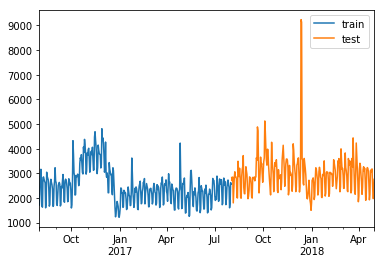

In [15]:
train.date = pd.to_datetime(train.date, format="%Y%m%d")
test.date = pd.to_datetime(test.date, format="%Y%m%d")
train.date.value_counts().sort_index().plot(label="train")
test.date.value_counts().sort_index().plot(label="test")
plt.legend()

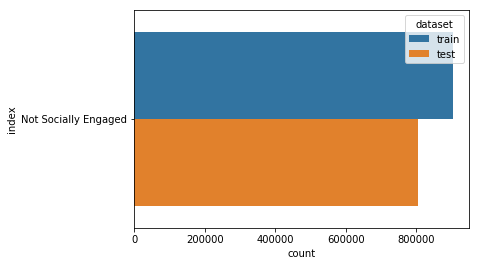

In [45]:
def drawBars(columnname):
    sns.barplot(x="count", y="index", hue="dataset",
        data=pd.melt(pd.concat([train[columnname].value_counts().rename("train"), 
                       test[columnname].value_counts().rename("test")], axis=1, sort="False").reset_index(),
            id_vars="index", var_name="dataset", value_name="count"))

drawBars("socialEngagementType")

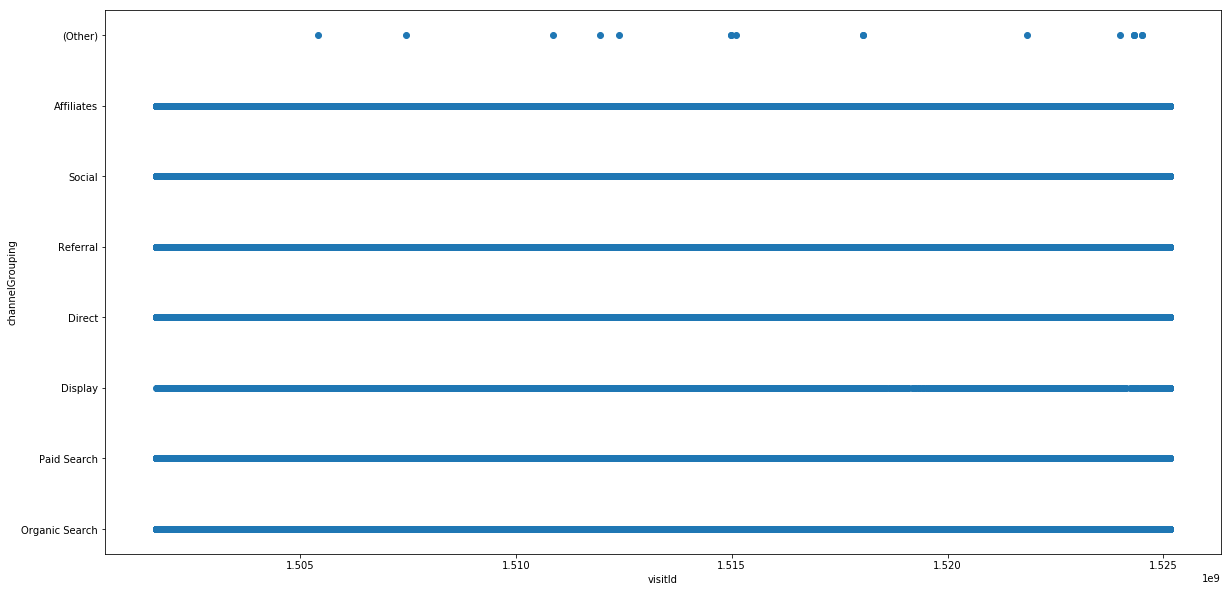

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(test['visitId'], test['channelGrouping'])
ax.set_xlabel('visitId')
ax.set_ylabel('channelGrouping')
plt.show()

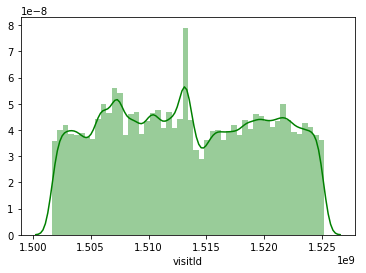

In [27]:
sns.distplot(test.geoNetwork, color='green')

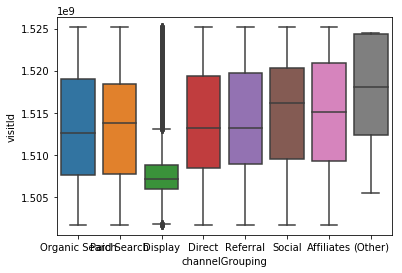

In [32]:
sns.boxplot(x=test['channelGrouping'],y=test['visitId'])

,date,visitId,visitNumber,visitStartTime
date,1.000000,0.880936,0.007536,0.880936
visitId,0.880936,1.000000,0.002069,1.000000
visitNumber,0.007536,0.002069,1.000000,0.002069
visitStartTime,0.880936,1.000000,0.002069,1.000000


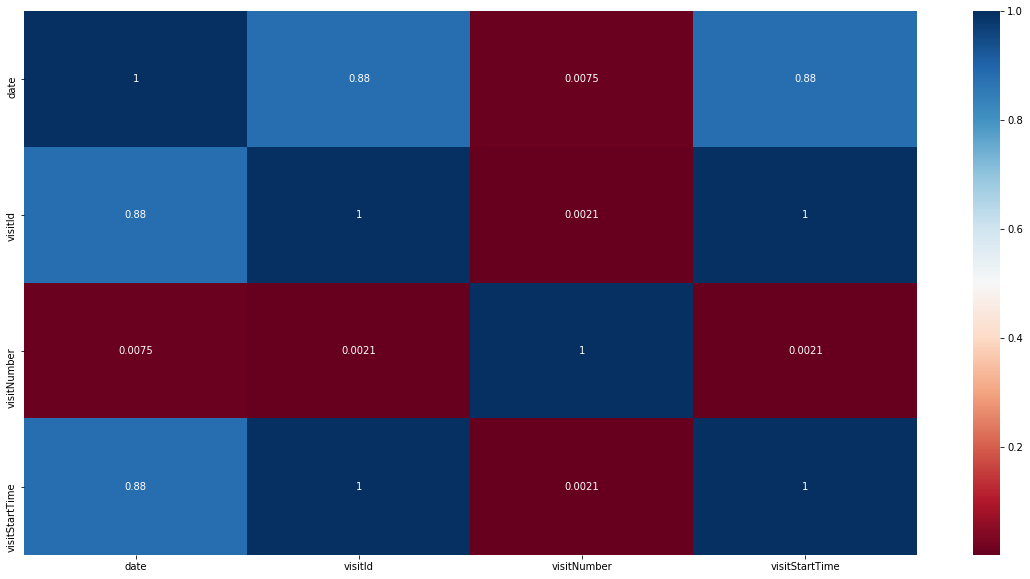

In [21]:
plt.figure(figsize=(20,10))
c= train.corr()
sns.heatmap(c,cmap="RdBu",annot=True)
c


#Conclusion:
From the line graph which is drawn between date and no. of visits for the two files seperated into test 
and train datasets fro better validation, shows that value counts during the DEC 2017 is higher than 
test value counts.

The horizontal bar graph shows the proportion of train and test datasets of the total visitors, and it 
gave results that in most the cases train dataset shows higher counts than test in the variables.

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are 
plotted between 'channelGrouping' and 'visitId' and we can see the plot below. With the plot given below, 
we can easily draw a trend line. These features provide a good scattering of points.

The distribution bar chart tells the distribution of the Visit Ids across the no. of visits and shows 
thateach visit Id visited the store in how many no. of occurences by setting set limit to the x-axis.

The boxplot shows the correlation between the visitId and channelGrouping where most of the visitors who 
have visited the store online had given their preference in the other categories rather than the ones 
mentioned in the above list and had very less correlation to the 'Display' category.

Finally the heatmap chart explains the correlation of the values between the variables and it shows high 
correlation between visitId and Visitstartime. SO that we can proceed some more analysis using these two
variables for further exploration of the dataset.